In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
Traindf=pd.read_excel('Data_Train.xlsx')

In [3]:
Traindf.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [4]:
Testdf=pd.read_excel('Data_Test.xlsx')

In [5]:
Testdf.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [6]:
Traindf["DATA"] = "train"
Testdf["DATA"] = "test"
Testdf["COST"]=0

In [7]:
df=pd.concat([Traindf,Testdf])

In [8]:
df.head()

,CITY,COST,CUISINES,DATA,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES
0,Thane,1200,"Malwani, Goan, North Indian",train,Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49 votes
1,Chennai,1500,"Asian, Modern Indian, Japanese",train,Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30 votes
2,Chennai,800,"North Indian, Chinese, Biryani, Hyderabadi",train,Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221 votes
3,Mumbai,800,"Tibetan, Chinese",train,Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24 votes
4,Mumbai,300,Desserts,train,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165 votes


In [9]:
df.shape

(16921, 10)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 4230
Data columns (total 10 columns):
CITY             16774 non-null object
COST             16921 non-null int64
CUISINES         16921 non-null object
DATA             16921 non-null object
LOCALITY         16793 non-null object
RATING           16917 non-null object
RESTAURANT_ID    16921 non-null int64
TIME             16921 non-null object
TITLE            16921 non-null object
VOTES            15315 non-null object
dtypes: int64(2), object(8)
memory usage: 1.4+ MB


In [11]:
df.isnull().sum()

CITY              147
COST                0
CUISINES            0
DATA                0
LOCALITY          128
RATING              4
RESTAURANT_ID       0
TIME                0
TITLE               0
VOTES            1606
dtype: int64

In [12]:
df['RESTAURANT_ID'].nunique()

15574

**CITY Column**

In [13]:
df['CITY'].value_counts().head(10)

Chennai         2855
Bangalore       2835
Hyderabad       2458
Mumbai          2311
New Delhi       1754
Kochi           1751
Gurgaon          524
Secunderabad     396
Noida            274
Navi Mumbai      222
Name: CITY, dtype: int64

In [14]:
df['LOCALITY'].value_counts().head()

Gachibowli     216
Indiranagar    187
Kakkanad       175
Kukatpally     171
Madhapur       169
Name: LOCALITY, dtype: int64

In [15]:
df['CITY'].fillna('None',inplace=True)

In [16]:
df['LOCALITY'].fillna('None',inplace=True)

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [18]:
df['CITY']=le.fit_transform(df['CITY'])

In [19]:
df['LOCALITY']=le.fit_transform(df['LOCALITY'])

In [20]:
pd.pivot_table(df,index=['CITY'],values=['COST']).head()

,COST
CITY,
0,300.000000
1,66.666667
2,400.000000
3,1200.000000
4,200.000000


In [21]:
pd.pivot_table(df,index=['LOCALITY'],values=['COST']).head()

,COST
LOCALITY,
0,200.0
1,0.0
2,300.0
3,150.0
4,400.0


**RATING Column**

In [22]:
df['RATING'].describe()

count     16917
unique       32
top         3.9
freq       1643
Name: RATING, dtype: object

In [23]:
df['RATING'].unique()

array(['3.6', '4.2', '3.8', '4.1', '4.0', '4.3', '3.9', '3.3', '3.4', '-',
       '4.5', '3.5', '4.4', '2.7', '3.7', '4.7', 'NEW', '3.1', '2.5',
       '4.6', '2.8', nan, '3.0', '3.2', '2.6', '2.9', '4.9', '4.8', '2.4',
       '2.3', '2.0', '2.1', '2.2'], dtype=object)

In [24]:
df['RATING'].value_counts()

3.9    1643
3.8    1604
4.0    1498
3.7    1437
3.6    1261
4.1    1217
3.5     988
4.2     968
NEW     930
3.4     777
4.3     740
-       672
3.3     485
4.4     484
3.2     349
4.5     274
3.1     263
2.9     242
3.0     229
2.8     191
4.6     184
2.7     129
4.7      90
2.6      85
2.5      51
4.8      49
4.9      28
2.4      24
2.3      15
2.2       4
2.1       4
2.0       2
Name: RATING, dtype: int64

In [25]:
df["RATING"].replace('NEW',1.5,inplace=True)

In [26]:
df["RATING"].replace('-',1.0,inplace=True)

In [27]:
df["RATING"].fillna(0.5,inplace=True)

In [28]:
df['RATING'].isnull().sum()

0

In [29]:
df['RATING']=df['RATING'].astype(float)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 4230
Data columns (total 10 columns):
CITY             16921 non-null int32
COST             16921 non-null int64
CUISINES         16921 non-null object
DATA             16921 non-null object
LOCALITY         16921 non-null int32
RATING           16921 non-null float64
RESTAURANT_ID    16921 non-null int64
TIME             16921 non-null object
TITLE            16921 non-null object
VOTES            15315 non-null object
dtypes: float64(1), int32(2), int64(2), object(5)
memory usage: 1.3+ MB


**VOTES Column**

In [31]:
df['VOTES'].value_counts()

44 votes      92
22 votes      88
6 votes       87
29 votes      83
28 votes      81
26 votes      81
24 votes      81
23 votes      80
25 votes      79
35 votes      78
33 votes      77
38 votes      76
42 votes      75
4 votes       75
57 votes      75
12 votes      74
13 votes      74
32 votes      74
54 votes      73
27 votes      73
15 votes      73
19 votes      73
31 votes      72
55 votes      71
52 votes      71
37 votes      71
8 votes       71
47 votes      71
20 votes      71
41 votes      70
              ..
3569 votes     1
944 votes      1
2455 votes     1
1742 votes     1
4177 votes     1
1504 votes     1
1426 votes     1
4551 votes     1
1873 votes     1
1513 votes     1
2397 votes     1
7926 votes     1
4814 votes     1
1817 votes     1
4606 votes     1
1579 votes     1
2005 votes     1
1905 votes     1
1843 votes     1
2400 votes     1
852 votes      1
1409 votes     1
1866 votes     1
1883 votes     1
3173 votes     1
2998 votes     1
2367 votes     1
2620 votes    

In [32]:
df['VOTES'].isnull().sum()

1606

In [33]:
df['VOTES'].unique()

array(['49 votes', '30 votes', '221 votes', ..., '2159 votes',
       '3807 votes', '1913 votes'], dtype=object)

In [34]:
df['VOTES'].fillna('0',inplace=True)

In [35]:
df['VOTES']=df['VOTES'].str.split(' ').str[0].astype(int)

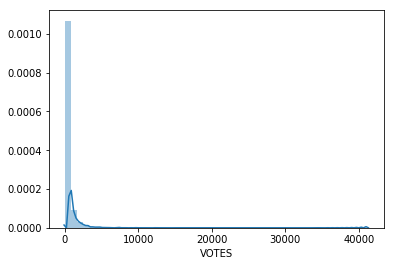

In [36]:
sns.distplot(df['VOTES'])

In [37]:
df['VOTES']=df['VOTES']+5
from scipy.stats import boxcox
df['VOTES']=boxcox(df['VOTES'],0)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 4230
Data columns (total 10 columns):
CITY             16921 non-null int32
COST             16921 non-null int64
CUISINES         16921 non-null object
DATA             16921 non-null object
LOCALITY         16921 non-null int32
RATING           16921 non-null float64
RESTAURANT_ID    16921 non-null int64
TIME             16921 non-null object
TITLE            16921 non-null object
VOTES            16921 non-null float64
dtypes: float64(2), int32(2), int64(2), object(4)
memory usage: 1.3+ MB


**CUISINES Column**

In [39]:
df['CUISINES'].nunique()

5183

In [40]:
df['CUISINES'].head(10)

0                   Malwani, Goan, North Indian
1                Asian, Modern Indian, Japanese
2    North Indian, Chinese, Biryani, Hyderabadi
3                              Tibetan, Chinese
4                                      Desserts
5       North Indian, Chinese, Seafood, Biryani
6    Cafe, Chinese, Pizza, North Indian, Burger
7                                      Bar Food
8                    South Indian, North Indian
9                                  North Indian
Name: CUISINES, dtype: object

In [41]:
df['CUISINES1']=df['CUISINES'].str.split(',').str[0]
df['CUISINES2']=df['CUISINES'].str.split(',').str[1]
df['CUISINES3']=df['CUISINES'].str.split(',').str[2]
df['CUISINES4']=df['CUISINES'].str.split(',').str[3]
df['CUISINES5']=df['CUISINES'].str.split(',').str[4]

In [42]:
df.isnull().sum()

CITY                 0
COST                 0
CUISINES             0
DATA                 0
LOCALITY             0
RATING               0
RESTAURANT_ID        0
TIME                 0
TITLE                0
VOTES                0
CUISINES1            0
CUISINES2         4047
CUISINES3         9330
CUISINES4        13309
CUISINES5        15550
dtype: int64

In [43]:
df['CUISINES2'].fillna('None',inplace=True)
df['CUISINES3'].fillna('None',inplace=True)
df['CUISINES4'].fillna('None',inplace=True)
df['CUISINES5'].fillna('None',inplace=True)

In [44]:
df['CUISINES1']=le.fit_transform(df['CUISINES1'])
df['CUISINES2']=le.fit_transform(df['CUISINES2'])
df['CUISINES3']=le.fit_transform(df['CUISINES3'])
df['CUISINES4']=le.fit_transform(df['CUISINES4'])
df['CUISINES5']=le.fit_transform(df['CUISINES5'])

In [45]:
df.drop(['CUISINES'],axis=1,inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 4230
Data columns (total 14 columns):
CITY             16921 non-null int32
COST             16921 non-null int64
DATA             16921 non-null object
LOCALITY         16921 non-null int32
RATING           16921 non-null float64
RESTAURANT_ID    16921 non-null int64
TIME             16921 non-null object
TITLE            16921 non-null object
VOTES            16921 non-null float64
CUISINES1        16921 non-null int32
CUISINES2        16921 non-null int32
CUISINES3        16921 non-null int32
CUISINES4        16921 non-null int32
CUISINES5        16921 non-null int32
dtypes: float64(2), int32(7), int64(2), object(3)
memory usage: 1.5+ MB


**TITLE Column**

In [47]:
df['TITLE'].head()

0        CASUAL DINING
1    CASUAL DINING,BAR
2        CASUAL DINING
3          QUICK BITES
4       DESSERT PARLOR
Name: TITLE, dtype: object

In [48]:
df['TITLE'].nunique()

123

In [49]:
df['TITLE'].unique()

array(['CASUAL DINING', 'CASUAL DINING,BAR', 'QUICK BITES',
       'DESSERT PARLOR', 'CAFÉ', 'MICROBREWERY',
       'QUICK BITES,BEVERAGE SHOP', 'CASUAL DINING,IRANI CAFE',
       'BAKERY,QUICK BITES', 'None', 'BAR,CASUAL DINING', 'BAR', 'PUB',
       'BEVERAGE SHOP', 'FINE DINING', 'CAFÉ,QUICK BITES',
       'BEVERAGE SHOP,DESSERT PARLOR', 'SWEET SHOP,QUICK BITES',
       'DESSERT PARLOR,SWEET SHOP', 'BAKERY', 'BAKERY,DESSERT PARLOR',
       'BAR,LOUNGE', 'FOOD COURT', 'LOUNGE',
       'DESSERT PARLOR,BEVERAGE SHOP', 'LOUNGE,CASUAL DINING',
       'FOOD TRUCK', 'QUICK BITES,FOOD COURT', 'SWEET SHOP',
       'BEVERAGE SHOP,FOOD COURT', 'PUB,CASUAL DINING', 'MESS',
       'MICROBREWERY,CASUAL DINING', 'CASUAL DINING,SWEET SHOP', 'KIOSK',
       'QUICK BITES,KIOSK', 'CLUB', 'FINE DINING,BAR',
       'DESSERT PARLOR,QUICK BITES', 'FOOD COURT,QUICK BITES',
       'LOUNGE,CAFÉ', 'BAKERY,CONFECTIONERY', 'CASUAL DINING,CAFÉ',
       'DHABA', 'CAFÉ,DESSERT PARLOR', 'QUICK BITES,DESSERT PARLOR'

In [50]:
df['TITLE'].value_counts()

QUICK BITES                     5634
CASUAL DINING                   4910
None                            1287
CAFÉ                             830
DESSERT PARLOR                   508
CASUAL DINING,BAR                463
FINE DINING                      406
BAKERY                           392
BEVERAGE SHOP                    216
BAR,CASUAL DINING                175
LOUNGE                           136
BAKERY,QUICK BITES               126
BAR                              124
FOOD COURT                       110
KIOSK                             73
SWEET SHOP,QUICK BITES            70
MESS                              68
PUB                               67
SWEET SHOP                        67
CASUAL DINING,CAFÉ                65
BAKERY,DESSERT PARLOR             61
DHABA                             61
DESSERT PARLOR,QUICK BITES        57
QUICK BITES,SWEET SHOP            49
CAFÉ,CASUAL DINING                47
BEVERAGE SHOP,QUICK BITES         45
CAFÉ,BAKERY                       43
P

In [51]:
df['TITLE1']=df['TITLE'].str.split(',').str[0]
df['TITLE2']=df['TITLE'].str.split(',').str[1]

In [52]:
df.isnull().sum()

CITY                 0
COST                 0
DATA                 0
LOCALITY             0
RATING               0
RESTAURANT_ID        0
TIME                 0
TITLE                0
VOTES                0
CUISINES1            0
CUISINES2            0
CUISINES3            0
CUISINES4            0
CUISINES5            0
TITLE1               0
TITLE2           14977
dtype: int64

In [53]:
df.fillna('None',inplace=True)

In [54]:
df['TITLE1']=le.fit_transform(df['TITLE1'])
df['TITLE2']=le.fit_transform(df['TITLE1'])

In [55]:
df.drop(['TITLE'],axis=1,inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16921 entries, 0 to 4230
Data columns (total 15 columns):
CITY             16921 non-null int32
COST             16921 non-null int64
DATA             16921 non-null object
LOCALITY         16921 non-null int32
RATING           16921 non-null float64
RESTAURANT_ID    16921 non-null int64
TIME             16921 non-null object
VOTES            16921 non-null float64
CUISINES1        16921 non-null int32
CUISINES2        16921 non-null int32
CUISINES3        16921 non-null int32
CUISINES4        16921 non-null int32
CUISINES5        16921 non-null int32
TITLE1           16921 non-null int32
TITLE2           16921 non-null int64
dtypes: float64(2), int32(8), int64(3), object(2)
memory usage: 1.5+ MB


In [57]:
df.drop(['TIME'],axis=1,inplace=True)

In [58]:
df.drop(['RESTAURANT_ID'],axis=1,inplace=True)

In [59]:
Trainfinal=df.loc[df['DATA']=='train']
Trainfinal.drop(['DATA'],axis=1,inplace=True)
Trainfinal.head()

,CITY,COST,LOCALITY,RATING,VOTES,CUISINES1,CUISINES2,CUISINES3,CUISINES4,CUISINES5,TITLE1,TITLE2
0,401,1200,328,3.6,3.988984,61,32,71,89,83,5,5
1,75,1500,1215,4.2,3.555348,6,62,45,89,83,5,5
2,75,800,1273,3.8,5.420535,74,23,14,34,83,5,5
3,277,800,161,4.1,3.367296,102,23,100,89,83,23,23
4,277,300,709,3.8,5.135798,30,100,100,89,83,9,9


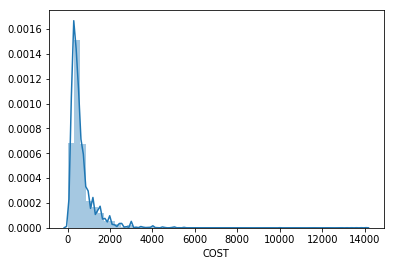

In [60]:
sns.distplot(Trainfinal['COST'])

In [61]:
Trainfinal['COST']=boxcox(Trainfinal['COST'],0)

In [62]:
Testfinal=df.loc[df['DATA']=='test']
Testfinal.drop(['COST'],axis=1,inplace=True)
Testfinal.drop(['DATA'],axis=1,inplace=True)

In [63]:
Testfinal.head()

,CITY,LOCALITY,RATING,VOTES,CUISINES1,CUISINES2,CUISINES3,CUISINES4,CUISINES5,TITLE1,TITLE2
0,323,1315,4.3,6.343880,74,23,67,43,83,5,5
1,277,429,4.2,4.189655,92,28,77,64,83,23,23
2,277,774,3.8,5.872118,74,83,14,19,83,5,5
3,128,846,3.8,7.279319,15,100,100,89,83,20,20
4,216,570,3.6,3.332205,92,48,100,89,83,23,23


In [64]:
x=Trainfinal.drop(['COST'],axis=1)
x.head()

,CITY,LOCALITY,RATING,VOTES,CUISINES1,CUISINES2,CUISINES3,CUISINES4,CUISINES5,TITLE1,TITLE2
0,401,328,3.6,3.988984,61,32,71,89,83,5,5
1,75,1215,4.2,3.555348,6,62,45,89,83,5,5
2,75,1273,3.8,5.420535,74,23,14,34,83,5,5
3,277,161,4.1,3.367296,102,23,100,89,83,23,23
4,277,709,3.8,5.135798,30,100,100,89,83,9,9


In [65]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [66]:
y=Trainfinal['COST']
y.head()

0    7.090077
1    7.313220
2    6.684612
3    6.684612
4    5.703782
Name: COST, dtype: float64

In [67]:
from sklearn.model_selection import train_test_split,cross_val_score

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=97)

In [69]:
print(x_train.shape,x_test.shape)

(8883, 11) (3807, 11)


In [70]:
print(y_train.shape,y_test.shape)

(8883,) (3807,)


In [71]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [72]:
LR=LinearRegression()
LA=Lasso()
RI=Ridge()
EN=ElasticNet()
KNR=KNeighborsRegressor()
DTR=DecisionTreeRegressor(random_state=97)
ABR=AdaBoostRegressor(random_state=97)
RFR=RandomForestRegressor(random_state=97)
GBR=GradientBoostingRegressor(random_state=97)
XGR=XGBRegressor(random_state=97)

In [73]:
models=[]
models.append(('LinearRegression',LR))
models.append(('Lasso',LA))
models.append(('Ridge',RI))
models.append(('ElasticNet',EN))
models.append(('DecisionTreeRegressor',DTR))
models.append(('KNeighborsRegressor',KNR))
models.append(('AdaBoostRegressor',ABR))
models.append(('RandomForestRegressor',RFR))
models.append(('GradientBoostingRegressor',GBR))
models.append(('XGBRegressor',XGR))

In [74]:
Model=[]
R2_score=[]
cvs=[]
MSE=[]
for name,model in models:
    print('*********************************',name,'*********************************')
    print('\n',model)
    Model.append(name)
    model.fit(x_train,y_train)
    pre=model.predict(x_test)
    r2=r2_score(y_test,pre)
    print('R2_score = ',r2)
    R2_score.append(r2)
    mse=mean_squared_error(y_test,pre)
    print("Mean_Squared_Error =",mse)
    MSE.append(round(mse,3))
    score= cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('Cross_Val_Score = ',score)
    cvs.append(score)
    print('\n')

********************************* LinearRegression *********************************

 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
R2_score =  0.33882964651379754
Mean_Squared_Error = 0.3510734292975331
Cross_Val_Score =  0.3337626563557965


********************************* Lasso *********************************

 Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
R2_score =  -3.5179274142871364e-05
Mean_Squared_Error = 0.5310065370516848
Cross_Val_Score =  -0.000917289212167427


********************************* Ridge *********************************

 Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
R2_score =  0.33882896897793724
Mean_Squared_Error = 0.3510737890608478
Cross_Val_Score =  0.33376277037946706


*******

In [75]:
result = pd.DataFrame({'Model': Model, 'R2_score': R2_score ,'Mean_Squared_Error' :MSE,'Cross_val_score':cvs})
result

,Model,R2_score,Mean_Squared_Error,Cross_val_score
0,LinearRegression,0.338830,0.351,0.333763
1,Lasso,-0.000035,0.531,-0.000917
2,Ridge,0.338829,0.351,0.333763
3,ElasticNet,-0.000035,0.531,-0.000917
4,DecisionTreeRegressor,0.430031,0.303,0.433159
5,KNeighborsRegressor,0.437973,0.298,0.461178
6,AdaBoostRegressor,0.504380,0.263,0.484032
7,RandomForestRegressor,0.662365,0.179,0.671951
8,GradientBoostingRegressor,0.679069,0.170,0.679326
9,XGBRegressor,0.676736,0.172,0.678568


In [76]:
from sklearn.model_selection import GridSearchCV
parameterGBR={
            'n_estimators':[100,200,300], 
            'loss':['ls', 'lad', 'huber', 'quantile'],
            'learning_rate': [0.1,0.05,0.02],
            'max_depth':[4,3], 
            'min_samples_leaf':[3], 
            'max_features':[1.0] 
            } 
gridGBR = GridSearchCV(GBR, param_grid=parameterGBR, n_jobs=-1, cv=10)
gridGBR.fit(x_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...te=97, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 300], 'loss': ['ls', 'lad', 'huber', 'quantile'], 'learning_rate': [0.1, 0.05, 0.02], 'max_depth': [4, 3], 'min_samples_leaf': [3], 'max_features': [1.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [77]:
gridGBR.best_score_ , gridGBR.best_params_

(0.7245491484670484,
 {'learning_rate': 0.1,
  'loss': 'ls',
  'max_depth': 4,
  'max_features': 1.0,
  'min_samples_leaf': 3,
  'n_estimators': 300})

In [78]:
GBR=GradientBoostingRegressor(learning_rate= 0.1,
  loss='ls',
  max_depth= 4,
  max_features= 1.0,
  min_samples_leaf= 3,
  n_estimators= 300)
GBR.fit(x_train,y_train)
score=cross_val_score(GBR,x,y,cv=10,scoring='r2').mean()

In [79]:
score

0.7326916704233822

**After tunning the GradientBoostingRegressor model the r2_score and cross_val_score is increase and I choose this model as my final model**

R2_score = 0.7245491484670484 

cross_val_score = 0.7326889815220388

In [80]:
from sklearn.externals import joblib
joblib.dump(GBR,"model_Food_cost.csv")

['model_Food_cost.csv']

In [81]:
model=joblib.load("model_Food_cost.csv")
model.predict(Testfinal)

array([4.92243133, 4.92243133, 4.92243133, ..., 4.92243133, 5.26854437,
       4.92243133])